## Walmart Inc. management team wants to Analyze customer behavior (specifically, purchase amount) by gender and other factors for better business decisions. They want to understand the spending habits: Do women spend more on Black Friday than men? (Assume 50 million customers of each gender)

In [207]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
from scipy.special import comb
from scipy.stats import binom, norm, poisson, expon

In [211]:
df = pd.read_csv("C:/Users/asus/Downloads/walmart_data.txt")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [166]:
df.shape

(550068, 10)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [15]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [17]:
df.isnull().sum().sum()

0

### Gender evaluation

In [22]:
df["Gender"].value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

In [25]:
df.groupby('Gender')['Purchase'].sum()

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64

In [26]:
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

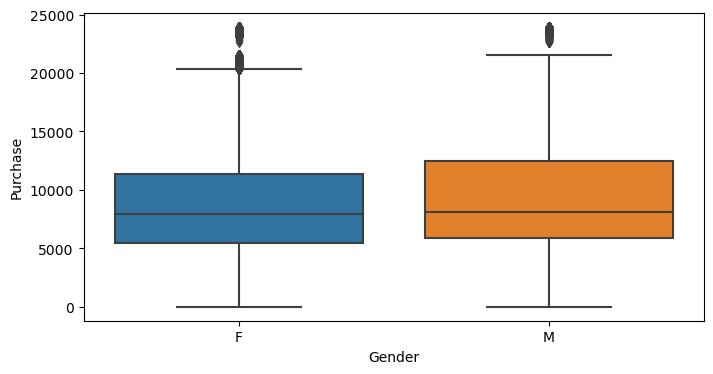

In [117]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Gender', y='Purchase', data=df)
# from this boxplot and above(describe), 50% shows that median purchage for male and female is almost the same

## 👆Median purchase amount for male(with mean=9437) and female(with mean=8734) is almost the same despite the huge difference in number of males and females


In [28]:
# we need to assume for 50 million, checking how many unique ids are there
df.groupby('Gender')['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

## 👆Need to extrapolate 50 million male and female based on thsese 1666 female and 4225 males

In [38]:
# getting the same describe on a sample of 500 purchases
df.sample(500).groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,113.0,8109.893805,4217.801072,49.0,5332.0,7807.0,10074.0,20855.0
M,387.0,9430.250646,5049.857400,62.0,5911.0,7993.0,12484.0,23671.0


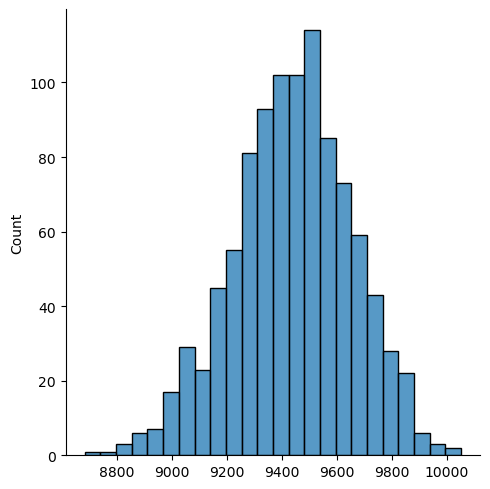

In [135]:
male_sample_trend = []
for i in range(1000):    
    sample_mean = df[df['Gender']=='M'].sample(500, replace=True)['Purchase'].mean()
    male_sample_trend.append(sample_mean)
sns.displot(male_sample_trend)

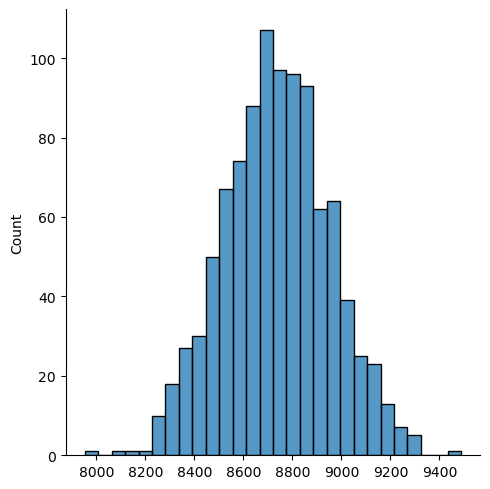

In [136]:
female_sample_trend= []
for i in range(1000):
    f_sample_mean = df[df['Gender']=='F'].sample(500, replace=True)['Purchase'].mean()
    female_sample_trend.append(f_sample_mean)
sns.displot(female_sample_trend)  

In [137]:
male_upper_limit= np.mean(male_sample_trend) + 1.96 * np.std(male_sample_trend)
male_lower_limit= np.mean(male_sample_trend) - 1.96 * np.std(male_sample_trend)
male_lower_limit, male_upper_limit

(9014.535248708962, 9862.260407291036)

In [138]:
female_upper_limit= np.mean(female_sample_trend) + 1.96 * np.std(female_sample_trend)
female_lower_limit= np.mean(female_sample_trend) - 1.96 * np.std(female_sample_trend)
female_lower_limit, female_upper_limit

(8315.019653859605, 9156.470390140394)

# 👆Since the the number(purchase) is overlapping on the confidence interval of 95%, we can not infer anything, need to try either chaging the sample size or confidence interval.

## 👇Changing the confidence interval to 90%

In [141]:
male_mean_at_90 = np.percentile(male_sample_trend, [5,95])
male_mean_at_90

array([9057.2269, 9783.2858])

In [142]:
female_mean_at_90 = np.percentile(female_sample_trend, [5,95])
female_mean_at_90

array([8378.0862, 9092.7196])

## 👆With 90 % confidence level, we can say that the average purchase amount of female is a little less that that of male

# 👇Exploration on 'Marital Status'

In [178]:
df["Marital_Status"].value_counts(normalize=True)*100

0    59.034701
1    40.965299
Name: Marital_Status, dtype: float64

In [182]:
df.groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

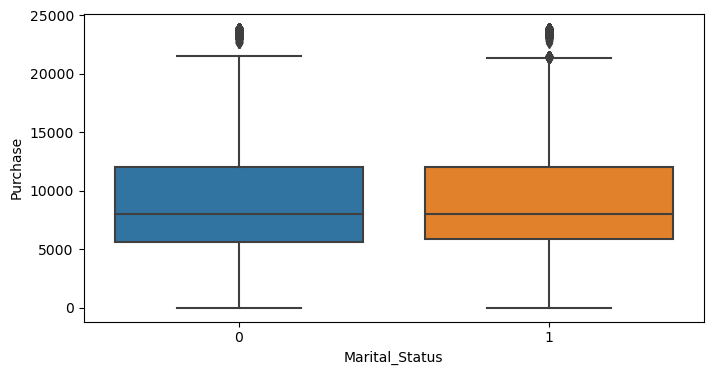

In [183]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Marital_Status', y='Purchase', data=df)

## 👆 Mean & Median both are same Married and single. (Considering the value '0' as single and '1' as married)

# 👇Bootstrapping 1000 times with sample size of 500

<AxesSubplot:ylabel='Count'>

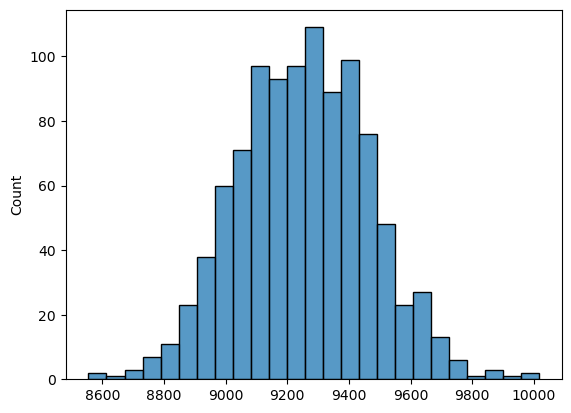

In [193]:
Married_mean_trend = []
for i in range(1000):    
    sample_mean = df[df['Marital_Status']==1].sample(500, replace=True)['Purchase'].mean()
    Married_mean_trend.append(sample_mean)
sns.histplot(Married_mean_trend)

<AxesSubplot:ylabel='Count'>

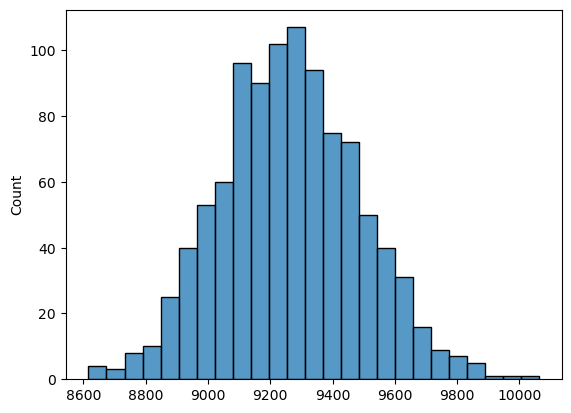

In [194]:
Unmarried_mean_trend = []
for i in range(1000):    
    sample_mean = df[df['Marital_Status']==0].sample(500, replace=True)['Purchase'].mean()
    Unmarried_mean_trend.append(sample_mean)
sns.histplot(Unmarried_mean_trend)

# 👇Checking the mean purchase for both gender at 95% CI

In [197]:
Married_mean_at_95 = np.percentile(Married_mean_trend, [2.5,97.5])
Married_mean_at_95

array([8856.2452, 9666.941 ])

In [198]:
Unmarried_mean_at_95 = np.percentile(Unmarried_mean_trend, [2.5,97.5])
Unmarried_mean_at_95

array([8852.0671, 9707.9992])

# 👇At 90% CI

In [201]:
Married_mean_at_90 = np.percentile(Married_mean_trend, [5, 95])
Married_mean_at_90

array([8913.7172, 9614.4567])

In [202]:
Unmarried_mean_at_90 = np.percentile(Unmarried_mean_trend, [5, 95])
Unmarried_mean_at_90

array([8906.4866, 9645.4848])

# 👇At 99% CI

In [231]:
Married_mean_at_99 = np.percentile(Married_mean_trend, [0.5, 99.5])
Married_mean_at_99

array([8723.31276, 9855.58507])

In [232]:
Unmarried_mean_at_99 = np.percentile(Unmarried_mean_trend, [0.5, 99.5])
Unmarried_mean_at_99

array([8689.23491, 9835.51772])

## 👆 Values of CIs are overlapping for all given confidence levels(90, 95 & 99)

# 👇Changing the sample size to 800

<AxesSubplot:ylabel='Count'>

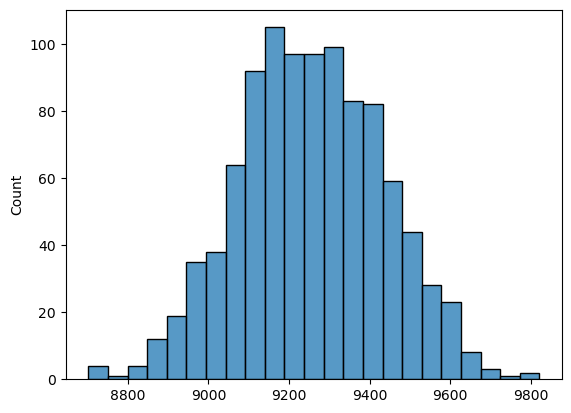

In [203]:
Married_mean_trend_1 = []
for i in range(1000):    
    sample_mean = df[df['Marital_Status']==1].sample(800, replace=True)['Purchase'].mean()
    Married_mean_trend_1.append(sample_mean)
sns.histplot(Married_mean_trend_1)

<AxesSubplot:ylabel='Count'>

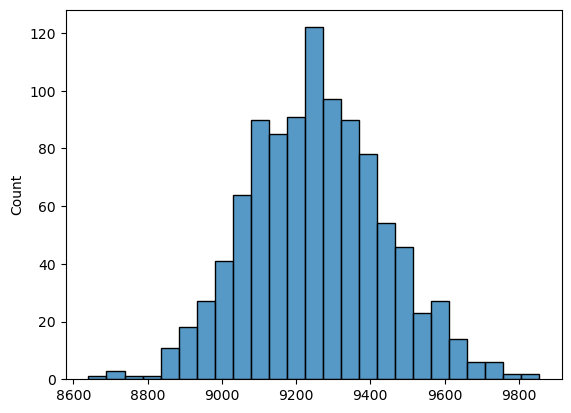

In [204]:
Unmarried_mean_trend_1 = []
for i in range(1000):    
    sample_mean = df[df['Marital_Status']==0].sample(800, replace=True)['Purchase'].mean()
    Unmarried_mean_trend_1.append(sample_mean)
sns.histplot(Unmarried_mean_trend_1)

In [205]:
Married_90 = np.percentile(Married_mean_trend_1, [5, 95])
Married_90

array([8961.1201875, 9549.1381875])

In [206]:
Unmarried_90 = np.percentile(Unmarried_mean_trend_1, [5, 95])
Unmarried_90

array([8965.79675  , 9573.9941875])

## 👆sample size does not make a difference

# 👇Exploration on Age

In [195]:
# Value counts of the age groups
df['Age'].value_counts(normalize=True)*100

26-35    39.919974
36-50    28.308136
18-25    18.117760
51+      10.908651
0-17      2.745479
Name: Age, dtype: float64

## 👇Changing the age group in only 3 categoties '0-25', '26-50', & '51+'

In [212]:
df['Age'] = df['Age'].replace({'0-17':'0-25', '18-25':'0-25','26-35':'26-50', '36-45':'26-50', 
                               '46-50':'26-50', '51-55':'51+', '55+':'51+'})
df['Age'].value_counts(normalize=True)*100

26-50    68.228110
0-25     20.863239
51+      10.908651
Name: Age, dtype: float64

In [213]:
df.groupby('Age')['Purchase'].sum() / df['Purchase'].sum() *100

Age
0-25     20.580856
26-50    68.275348
51+      11.143797
Name: Purchase, dtype: float64

In [214]:
df.groupby('Age')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-25,114762.0,9138.581220,5045.103594,12.0,5405.0,8022.0,12013.0,23958.0
26-50,375301.0,9270.382613,5009.074262,12.0,5831.0,8040.0,12059.0,23961.0
51+,60005.0,9463.661678,5061.161476,12.0,6018.0,8122.0,12106.0,23960.0


## mean spent of '51+' age group is slightly higher than others

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

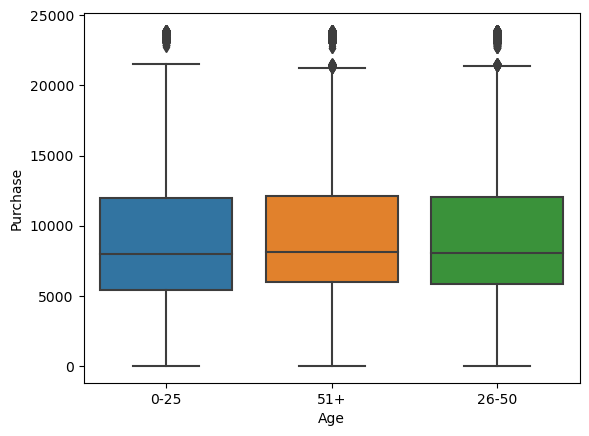

In [215]:
sns.boxplot(x='Age', y='Purchase', data=df)

<AxesSubplot:ylabel='Count'>

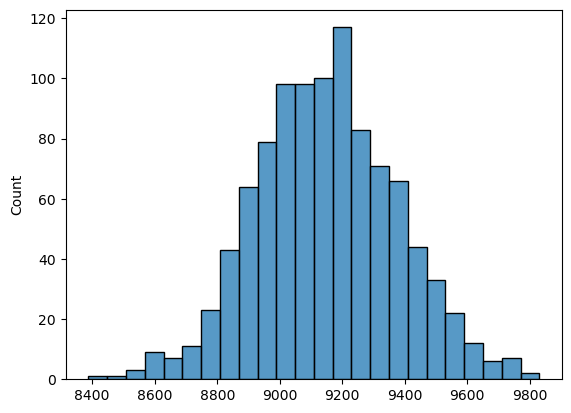

In [217]:
sample_0_25_trend = []
for i in range(1000):    
    sample_mean = df[df['Age']=='0-25'].sample(500, replace=True)['Purchase'].mean()
    sample_0_25_trend.append(sample_mean)
sns.histplot(sample_0_25_trend)

<AxesSubplot:ylabel='Count'>

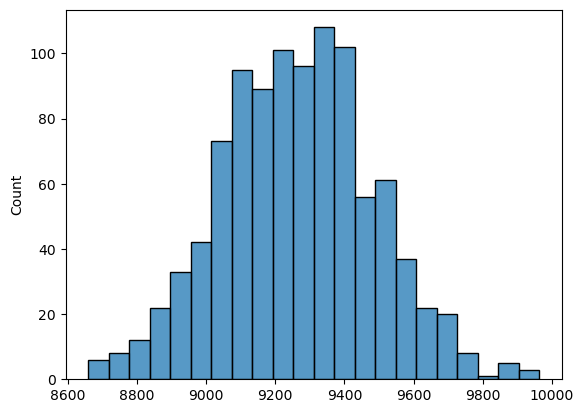

In [218]:
sample_26_50_trend = []
for i in range(1000):    
    sample_mean = df[df['Age']=='26-50'].sample(500, replace=True)['Purchase'].mean()
    sample_26_50_trend.append(sample_mean)
sns.histplot(sample_26_50_trend)

<AxesSubplot:ylabel='Count'>

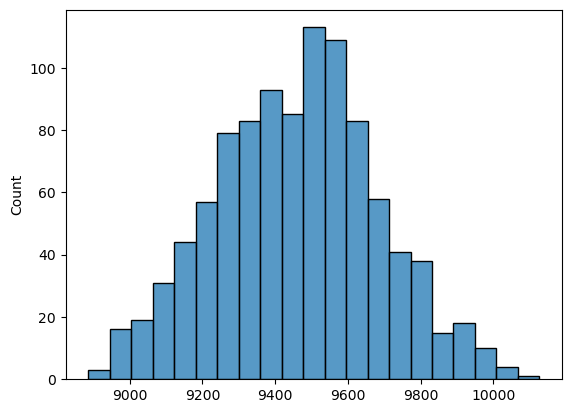

In [219]:
sample_51_plus_trend = []
for i in range(1000):    
    sample_mean = df[df['Age']=='51+'].sample(500, replace=True)['Purchase'].mean()
    sample_51_plus_trend.append(sample_mean)
sns.histplot(sample_51_plus_trend)

# Checking CI of mean values at confidence level of 99, 95 & 90 respectively for all 3 age groups

In [224]:
CI_99_0_25 = np.percentile(sample_0_25_trend, [0.5, 99.5])
CI_99_0_25                          

array([8573.59855, 9732.53111])

In [225]:
CI_99_26_50 = np.percentile(sample_26_50_trend, [0.5, 99.5])
CI_99_26_50                          

array([8713.57584, 9878.81968])

In [226]:
CI_99_51_plus = np.percentile(sample_51_plus_trend, [0.5, 99.5])
CI_99_51_plus                          

array([8957.71906, 9996.06423])

In [221]:
CI_95_0_25 = np.percentile(sample_0_25_trend, [2.5, 97.5])
CI_95_0_25                          

array([8712.72965, 9605.24435])

In [222]:
CI_95_26_50 = np.percentile(sample_26_50_trend, [2.5, 97.5])
CI_95_26_50                          

array([8835.08105, 9688.61375])

In [227]:
CI_95_51_plus = np.percentile(sample_51_plus_trend, [2.5, 97.5])
CI_95_51_plus                          

array([9013.37725, 9908.99975])

In [228]:
CI_90_0_25 = np.percentile(sample_0_25_trend, [5, 95])
CI_90_0_25                          

array([8797.0388, 9526.7737])

In [229]:
CI_90_26_50 = np.percentile(sample_26_50_trend, [5, 95])
CI_90_26_50                          

array([8902.8663, 9634.7874])

In [233]:
CI_90_51_plus = np.percentile(sample_51_plus_trend, [5, 95])
CI_90_51_plus                          

array([9085.9786, 9828.027 ])

## 👆Values are overlapping

# Insights & Recommendations:
## 1) Gender and Purchase Amount:
#### •	The median purchase amount for males and females is almost the same, despite the difference in the number of males and females. This indicates that there may not be a significant difference in spending behavior between genders.
#### •	However, the mean purchase amount is slightly higher for males compared to females. This suggests that there may be some variation in spending patterns between genders.
## 2) Gender and Average Purchase Amount:
#### •	With a 90% confidence level, it can be inferred that the average purchase amount of females is slightly lower than that of males. This implies that, on average, males may spend slightly more than females.
#### •	It's important to note that the difference in means may not be substantial, and further analysis or a larger sample size may be needed to draw more conclusive insights.
## 3) Marital Status and Purchase Amount:
#### •	The mean and median purchase amounts are the same for both married and single individuals. This indicates that marital status does not have a significant impact on purchase behavior in the given dataset.
## 4) Gender and Confidence Intervals:
### •	The confidence intervals for the mean purchase amounts of males and females overlap at all given confidence levels (90%, 95%, and 99%). This suggests that there is no statistically significant difference in the mean purchase amounts between genders in the population.
### •	The overlapping confidence intervals indicate that the observed differences in the sample means could be due to random sampling variability rather than a true difference in the population.
## 5) Age Group and Purchase Amount:
#### •	The '51+' age group has a slightly higher mean purchase amount compared to other age groups. This suggests that older individuals may tend to spend slightly more on purchases.

## Based on these findings, the following recommendations can be made:
#### •	Consider targeted marketing strategies to cater to the specific preferences and behaviors of different genders.
#### •	Further investigate the factors that contribute to the difference in mean purchase amounts between genders, such as product preferences, marketing channels, or customer demographics.
#### •	Continuously monitor and analyze purchase behavior across different age groups to identify trends and opportunities for tailored marketing campaigns.
#### •	Conduct additional research or collect more data to validate the findings and gain deeper insights into the factors influencing purchase behavior.
#### •	Consider conducting customer surveys or interviews to gather qualitative data and understand the underlying motivations behind purchase decisions.




